## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:/New folder (2)/Car Brand Classification/Datasets/train'
valid_path = 'D:/New folder (2)/Car Brand Classification/Datasets/test'


In [17]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [18]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [20]:
  # useful for getting number of output classes
folders = glob('D:/New folder (2)/Car Brand Classification/Datasets/train/*')

In [21]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [23]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [24]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [25]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/New folder (2)/Car Brand Classification/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [27]:
test_set = test_datagen.flow_from_directory('D:/New folder (2)/Car Brand Classification/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Raman\AppData\Local\Temp/ipykernel_12592/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 10s 6s/step - loss: 5.0387 - accuracy: 0.3125 - val_loss: 9.1434 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 7s 5s/step - loss: 13.6247 - accuracy: 0.3125 - val_loss: 4.4859 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 7s 5s/step - loss: 7.0516 - accuracy: 0.3906 - val_loss: 2.8588 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 8s 6s/step - loss: 3.3757 - accuracy: 0.3125 - val_loss: 6.5375 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 8s 6s/step - loss: 5.0286 - accuracy: 0.3281 - val_loss: 4.7449 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 8s 6s/step - loss: 4.9353 - accuracy: 0.3594 - val_loss: 2.5841 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 8s 6s/step - loss: 1.4868 - accuracy: 0.5156 - val_loss: 3.4201 - val_accuracy: 0.3276
Epoch 8/50
2/2 [=======================

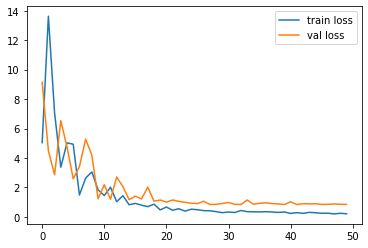

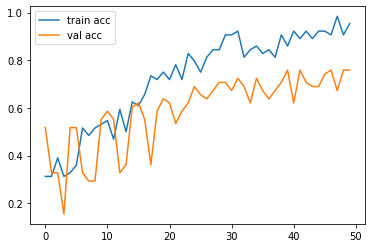

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [31]:

y_pred = model.predict(test_set)


In [32]:
y_pred

array([[2.85158902e-02, 9.28875208e-01, 4.26088460e-02],
       [5.23687158e-05, 6.29888615e-04, 9.99317765e-01],
       [9.51075810e-04, 9.95654464e-01, 3.39448196e-03],
       [4.09661457e-02, 9.27214205e-01, 3.18196416e-02],
       [1.36931315e-01, 1.77116036e-01, 6.85952604e-01],
       [9.90338624e-02, 5.09044945e-01, 3.91921192e-01],
       [1.22852340e-01, 6.12743735e-01, 2.64403909e-01],
       [1.93551004e-01, 4.89814818e-01, 3.16634178e-01],
       [1.16786666e-01, 8.70510459e-01, 1.27028860e-02],
       [7.51155615e-01, 1.58682793e-01, 9.01616216e-02],
       [2.26901159e-01, 1.74271882e-01, 5.98826885e-01],
       [2.57536143e-01, 3.35437804e-01, 4.07025993e-01],
       [6.31202757e-01, 2.49843568e-01, 1.18953638e-01],
       [2.55084201e-03, 9.95983362e-01, 1.46585586e-03],
       [1.15458027e-01, 4.84448625e-03, 8.79697502e-01],
       [8.11702609e-02, 3.98819476e-01, 5.20010352e-01],
       [1.44147538e-02, 7.29041323e-02, 9.12681103e-01],
       [1.09545048e-02, 9.59259

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0,
       1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2], dtype=int64)

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model=load_model('model_resnet50.h5')

In [38]:
img=image.load_img('D:/New folder (2)/Car Brand Classification/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [39]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [40]:
x.shape

(224, 224, 3)

In [41]:
x=x/255

In [42]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

array([[0.02833074, 0.00225891, 0.9694103 ]], dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)

In [45]:
a==1

array([False])